## 3.4 Counting Coding

In [1]:
from sklearn.model_selection import GroupKFold
import matplotlib.pyplot as plt
import IPython

import pandas as pd
import numpy as np
import teradataml
from teradataml import *

In [2]:
data = pd.read_csv('2019-Nov.csv')
df = data[:round(len(data)/10000)].copy()
df['event_time']=pd.to_datetime(df['event_time'])
df['timestamp']=df['event_time'].dt.strftime('%m/%d/%Y')
df['day'] = df['event_time'].dt.day
df['month'] = df['event_time'].dt.month
df['year'] = df['event_time'].dt.year
df['ts_weekday'] = df['event_time'].dt.weekday
df['hour'] = df['event_time'].dt.hour
df['target'] = df['event_type'].apply(lambda x: '1' if x == 'purchase' else 0)
cols = ['brand', 'user_session', 'category_code']

for col in cols:
    df['NA_' + col] = df[col].isna().astype(np.int8)
    df[col].fillna('UNKNOWN', inplace=True)

df['target']=df['target'].astype(int)
df['product_id']=df['product_id'].astype(object)
cat=['cat_0','cat_1','cat_2','cat_3']
df[cat]= df['category_code'].str.split('.', expand=True)



colss= ['cat_0','cat_1','cat_2','cat_3']
for col in colss:
    df[col].fillna('UNKNOWN', inplace=True)
    

    
    
    
df_validation= df[10000:]
print(df.shape,df_validation.shape)    
df.head()
  




(6750, 23) (0, 23)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timestamp,...,ts_weekday,hour,target,NA_brand,NA_user_session,NA_category_code,cat_0,cat_1,cat_2,cat_3
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,11/01/2019,...,4,0,0,0,0,0,electronics,smartphone,UNKNOWN,UNKNOWN
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,11/01/2019,...,4,0,0,0,0,0,appliances,sewing_machine,UNKNOWN,UNKNOWN
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,11/01/2019,...,4,0,0,0,0,1,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,11/01/2019,...,4,0,0,0,0,0,appliances,kitchen,washer,UNKNOWN
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,11/01/2019,...,4,0,0,0,0,0,electronics,smartphone,UNKNOWN,UNKNOWN


## Theory
*Count Encoding (CE)* calculates the frequency from one or more categorical features given the training dataset.

For example we can consider Count Encoding as the populiarity of an item or activity of an user.

In [3]:
cat = 'product_id'
ce = df[cat].value_counts()
ce

1004856     68
1005115     52
1004767     51
10301494    48
1005105     47
            ..
1307076      1
15800179     1
38900026     1
12700433     1
3700627      1
Name: product_id, Length: 3084, dtype: int64

In [4]:
ce=ce.reset_index()


In [5]:
ce.columns = [cat,'CE_' + cat]
df = df.merge(ce, how ='left',left_on = cat,right_on=cat)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timestamp,...,hour,target,NA_brand,NA_user_session,NA_category_code,cat_0,cat_1,cat_2,cat_3,CE_product_id
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,11/01/2019,...,0,0,0,0,0,electronics,smartphone,UNKNOWN,UNKNOWN,4
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,11/01/2019,...,0,0,0,0,0,appliances,sewing_machine,UNKNOWN,UNKNOWN,17
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,11/01/2019,...,0,0,0,0,1,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,1
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,11/01/2019,...,0,0,0,0,0,appliances,kitchen,washer,UNKNOWN,1
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,11/01/2019,...,0,0,0,0,0,electronics,smartphone,UNKNOWN,UNKNOWN,8


In [6]:
ce = df[['category_id', 'brand', 'target']].groupby(['category_id', 'brand']).agg(['count'])
ce= ce.reset_index()


In [7]:
ce.head()

,category_id,brand,target
,,,count
0,2053013552259662037,ariston,2
1,2053013552259662037,bosch,4
2,2053013552259662037,buderus,2
3,2053013552259662037,navien,1
4,2053013552259662037,riga,1


In [8]:
ce.columns= ['category_id', 'brand', 'CE_category_brand']
ce

,category_id,brand,CE_category_brand
0,2053013552259662037,ariston,2
1,2053013552259662037,bosch,4
2,2053013552259662037,buderus,2
3,2053013552259662037,navien,1
4,2053013552259662037,riga,1
...,...,...,...
1058,2172371436436455782,huawei,1
1059,2172371436436455782,irbis,2
1060,2172371436436455782,lenovo,2
1061,2172371436436455782,samsung,8


In [9]:
df= df.merge(ce,how='left' , left_on=['category_id', 'brand'], right_on=['category_id', 'brand'])

df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timestamp,...,target,NA_brand,NA_user_session,NA_category_code,cat_0,cat_1,cat_2,cat_3,CE_product_id,CE_category_brand
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,11/01/2019,...,0,0,0,0,electronics,smartphone,UNKNOWN,UNKNOWN,4,351
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,11/01/2019,...,0,0,0,0,appliances,sewing_machine,UNKNOWN,UNKNOWN,17,28
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,11/01/2019,...,0,0,0,1,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,1,6
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,11/01/2019,...,0,0,0,0,appliances,kitchen,washer,UNKNOWN,1,11
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,11/01/2019,...,0,0,0,0,electronics,smartphone,UNKNOWN,UNKNOWN,8,351


Count Encoding creates a new feature, which can be used by the model for training. It groups categorical values based on the frequency together.

For example,

users, which have only 1 interaction in the datasets, are encoded with 1. Instead of having 1 datapoint per user, now, the model can learn a behavior pattern of these users at once.
products, which have many interactions in the datasets, are encoded with a high number. The model can learn to see them as top sellers and treat them, accordingly.

The advantage of Count Encoding is that the category values are grouped together based on behavior. Particularly in cases with only a few observation, a decision tree is not able to create a split and neural networks have only a few gradient descent updates for these values.
Summary
Count Encoding calculates frequency of categories
The model is trained based on these frequencies
Note
In competition, we could count encode the categories for the datasets in different ways:

Count Encode the training dataset and apply it to the validation dataset
Count Encode the training dataset and Count Encode the validataion dataset, separatly
Merge the training dataset and validation dataset, Count Encode the concatenated dataset and apply to both datasets

Our focus is on industry applications, therefore only the first process is a valid real-world solution. We may can collect statistics as a stream and update the characteristic of our dataset, but it is probably cleaner to increase the training frequency of our recommender models.

In [10]:
cat='user_id'

ce= df[[cat,'target']].groupby([cat]).count()
ce=ce.reset_index()


In [11]:
ce.columns = [cat,'CT_'+cat]
ce

,user_id,CT_user_id
0,422073359,1
1,436701163,1
2,442818338,1
3,450284033,1
4,454621403,2
...,...,...
1447,566285120,4
1448,566285129,1
1449,566285177,1
1450,566285178,1


In [12]:
df=df.merge(ce,how= 'left',on=cat)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timestamp,...,NA_brand,NA_user_session,NA_category_code,cat_0,cat_1,cat_2,cat_3,CE_product_id,CE_category_brand,CT_user_id
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,11/01/2019,...,0,0,0,electronics,smartphone,UNKNOWN,UNKNOWN,4,351,10
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,11/01/2019,...,0,0,0,appliances,sewing_machine,UNKNOWN,UNKNOWN,17,28,1
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,11/01/2019,...,0,0,1,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,1,6,11
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,11/01/2019,...,0,0,0,appliances,kitchen,washer,UNKNOWN,1,11,2
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,11/01/2019,...,0,0,0,electronics,smartphone,UNKNOWN,UNKNOWN,8,351,3


In [13]:
def count_encode(train, valid, col, gpu=True):
    """
        train:  train dataset
        valid:  validation dataset
        col:    column which will be count encoded (in the example RESOURCE)
    """
    # We keep the original order as cudf merge will not preserve the original order
    if gpu:
        train['org_sorting'] = cupy.arange(len(train), dtype="int32")
    else:
        train['org_sorting'] = np.arange(len(train), dtype="int32")
    
    train_tmp = train[col].value_counts().reset_index()
    train_tmp.columns = [col,  'CE_' + col]
    df_tmp = train[[col, 'org_sorting']].merge(train_tmp, how='left', left_on=col, right_on=col).sort_values('org_sorting')
    train['CE_' + col] = df_tmp['CE_' + col].fillna(0).values
        
    if gpu:
        valid['org_sorting'] = cupy.arange(len(valid), dtype="int32")
    else:
        valid['org_sorting'] = np.arange(len(valid), dtype="int32")
    df_tmp = valid[[col, 'org_sorting']].merge(train_tmp, how='left', left_on=col, right_on=col).sort_values('org_sorting')
    valid['CE_' + col] = df_tmp['CE_' + col].fillna(0).values
    
    valid = valid.drop('org_sorting', axis=1)
    train = train.drop('org_sorting', axis=1)
    return(train, valid)

In [14]:
df_train_pd, df_valid_pd = count_encode(df, df_validation, 'user_id', gpu=False)

In [15]:
df_train_pd.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timestamp,...,NA_user_session,NA_category_code,cat_0,cat_1,cat_2,cat_3,CE_product_id,CE_category_brand,CT_user_id,CE_user_id
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,11/01/2019,...,0,0,electronics,smartphone,UNKNOWN,UNKNOWN,4,351,10,10
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,11/01/2019,...,0,0,appliances,sewing_machine,UNKNOWN,UNKNOWN,17,28,1,1
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,11/01/2019,...,0,1,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,1,6,11,11
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,11/01/2019,...,0,0,appliances,kitchen,washer,UNKNOWN,1,11,2,2
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,11/01/2019,...,0,0,electronics,smartphone,UNKNOWN,UNKNOWN,8,351,3,3


## 4. Feature Engineering - Numerical
### 4.1. Binning
## Theory
*Binning* maps multiple ordinal categorical or numerical features into groups. It is mainly applied to numerical features:

- prevent overfitting by grouping values together enables us to add some expert knowledge into the model
  most simple case: binary flags, e.g. features is greater than 0

- Examples:
  binning weekdays into weekday and weekend binning hours into morning, early afternoon, late afternoon, evening and night
  binning age into child, adlult and retired We can take a look on the hour of the day. We can see multiple patterns:

- 0-3 Night: Low purchase probability
- 4-7 Early morning: Mid purchase probability
- 8-14 Morning/Lunch: Higher purchase probability
- 15-20 Afternoon: Low purchase probability
- 21-23: Evening: High purchase probability

In [16]:
df[['hour', 'target']].groupby('hour').agg(['count', 'mean'])

target          
      count      mean
hour                 
0      6750  0.011407

In [17]:
hour = list(range(0,24))
hour_bin = [0]*4 + [1]*4 + [2]*7 + [3]*6 + [4]*3
data = pd.DataFrame({
    'hour': hour,
    'hour_bin': hour_bin,
})
data.head()

,hour,hour_bin
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1


In [18]:
df_train = df.merge(data, how='left', right_on='hour', left_on='hour')
df_train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timestamp,...,cat_0,cat_1,cat_2,cat_3,CE_product_id,CE_category_brand,CT_user_id,org_sorting,CE_user_id,hour_bin
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,11/01/2019,...,electronics,smartphone,UNKNOWN,UNKNOWN,4,351,10,0,10,0
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,11/01/2019,...,appliances,sewing_machine,UNKNOWN,UNKNOWN,17,28,1,1,1,0
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,11/01/2019,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,1,6,11,2,11,0
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,11/01/2019,...,appliances,kitchen,washer,UNKNOWN,1,11,2,3,2,0
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,11/01/2019,...,electronics,smartphone,UNKNOWN,UNKNOWN,8,351,3,4,3,0


In [19]:
df_train[['category_code','target']].groupby(['category_code']).agg(['mean', 'count'])

target      
                        mean count
category_code                     
UNKNOWN             0.007661  2480
accessories.bag     0.000000    24
accessories.wallet  0.000000    29
apparel.costume     0.000000    23
apparel.dress       0.000000     9
...                      ...   ...
kids.skates         0.000000     2
kids.toys           0.000000    16
sport.bicycle       0.000000    31
sport.snowboard     0.000000     4
sport.trainer       0.000000     6

[94 rows x 2 columns]

In [20]:
df_train[['hour_bin', 'target']].groupby('hour_bin').agg(['count', 'mean'])



target          
          count      mean
hour_bin                 
0          6750  0.011407

- Binning the numerical features reduces the cardinality (# of unique values). Therefore, a model can easier learn the relationship to the target variables, as  there are more observation per category. In addition, binning prevents overfitting.

- Another reason to apply binning is to standardize numeric variables per category group. The datasets provides information about the product category (cat_1) and price information.

- For example, the headphones and smartphones have a different price distribution.

- We can probably buy good headphones between 200
  For a good smartphone, prices are probably in the range of 1200
  Therefore, the buying behavior should be different depending on the price per category (what is a good deal).

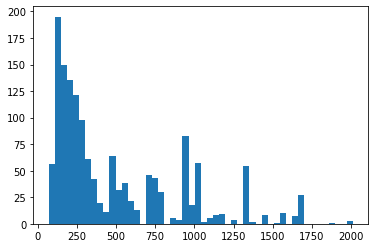

In [21]:
d=df_train[df_train['category_code']=='electronics.smartphone'].price
plt.hist( d, bins=50)
plt.show()

In [22]:
print('Headphones mean price: ' + str(df_train[df_train['category_code']=='electronics.headphone'].price.mean()) + ' median price: ' + str(df_train[df_train['category_code']=='electronics.headphone'].price.median()))
print('Smartphones mean price: ' + str(df_train[df_train['category_code']=='electronics.smartphone'].price.mean()) + ' median price: ' + str(df_train[df_train['category_code']=='electronics.smartphone'].price.median()))


Headphones mean price: nan median price: nan
Smartphones mean price: 489.71127358490395 median price: 281.71


In [23]:
df_train['cat_012'] = df_train['cat_0'].astype(str) + '_' + df_train['cat_1'].astype(str) + '_' + df_train['cat_2'].astype(str)
df_train.head()

#

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timestamp,...,cat_1,cat_2,cat_3,CE_product_id,CE_category_brand,CT_user_id,org_sorting,CE_user_id,hour_bin,cat_012
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,11/01/2019,...,smartphone,UNKNOWN,UNKNOWN,4,351,10,0,10,0,electronics_smartphone_UNKNOWN
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,11/01/2019,...,sewing_machine,UNKNOWN,UNKNOWN,17,28,1,1,1,0,appliances_sewing_machine_UNKNOWN
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,11/01/2019,...,UNKNOWN,UNKNOWN,UNKNOWN,1,6,11,2,11,0,UNKNOWN_UNKNOWN_UNKNOWN
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,11/01/2019,...,kitchen,washer,UNKNOWN,1,11,2,3,2,0,appliances_kitchen_washer
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,11/01/2019,...,smartphone,UNKNOWN,UNKNOWN,8,351,3,4,3,0,electronics_smartphone_UNKNOWN


### We calculate the quantiles per category group and then merge the quantile to the original dataframe.



In [24]:
q_list=[0.1, 0.25, 0.5, 0.75, 0.9]

for q_value in q_list:
    q = df_train[['cat_012', 'price']].groupby(['cat_012']).quantile(q_value)
    q = q.reset_index()
    q.columns = ['cat_012', 'price' + str(q_value)]
    df_train = df_train.merge(q, how='left', on='cat_012')
    

In [25]:
df_train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timestamp,...,CT_user_id,org_sorting,CE_user_id,hour_bin,cat_012,price0.1,price0.25,price0.5,price0.75,price0.9
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,11/01/2019,...,10,0,10,0,electronics_smartphone_UNKNOWN,128.42,178.8700,281.71,732.0700,1029.334
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,11/01/2019,...,1,1,1,0,appliances_sewing_machine_UNKNOWN,132.25,189.1925,293.65,293.6500,293.650
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,11/01/2019,...,11,2,11,0,UNKNOWN_UNKNOWN_UNKNOWN,15.44,36.0400,81.86,237.1325,461.863
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,11/01/2019,...,2,3,2,0,appliances_kitchen_washer,121.71,206.3325,302.94,321.7300,419.480
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,11/01/2019,...,3,4,3,0,electronics_smartphone_UNKNOWN,128.42,178.8700,281.71,732.0700,1029.334


## Afterwards, we loop through the columns and update the price_bin depending, if the price is between quantiles.

In [26]:
df_train['price_bin'] = -1

for i, q_value in enumerate(q_list):
    if i == 0:
        df_train.loc[df_train['price']<=df_train['price' + str(q_value)], 'price_bin'] = i
    else:
        df_train.loc[(df_train['price']>df_train['price' + str(q_list[i-1])]) & (df_train['price']<=df_train['price' + str(q_value)]), 'price_bin'] = i
        
df_train.loc[df_train['price']>df_train['price' + str(q_value)], 'price_bin'] = i+1


In [27]:

df_train[df_train['price_bin']==3][['price', 'price0.1', 'price0.25', 'price0.5', 'price0.75', 'price0.9', 'price_bin']].drop_duplicates()


,price,price0.1,price0.25,price0.5,price0.75,price0.9,price_bin
0,489.07,128.42,178.87,281.71,732.0700,1029.334,3
9,732.07,128.42,178.87,281.71,732.0700,1029.334,3
12,31.64,12.84,16.96,30.89,49.6150,97.810,3
20,88.81,15.44,36.04,81.86,237.1325,461.863,3
23,591.78,349.28,352.11,543.10,774.4400,858.518,3
...,...,...,...,...,...,...,...
6651,308.61,128.42,178.87,281.71,732.0700,1029.334,3
6669,98.05,15.44,36.04,81.86,237.1325,461.863,3
6677,218.80,45.02,51.22,185.31,347.5000,967.820,3
6717,87.26,15.44,36.04,81.86,237.1325,461.863,3


In [28]:
df_train.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session',
       'timestamp', 'day', 'month', 'year', 'ts_weekday', 'hour', 'target',
       'NA_brand', 'NA_user_session', 'NA_category_code', 'cat_0', 'cat_1',
       'cat_2', 'cat_3', 'CE_product_id', 'CE_category_brand', 'CT_user_id',
       'org_sorting', 'CE_user_id', 'hour_bin', 'cat_012', 'price0.1',
       'price0.25', 'price0.5', 'price0.75', 'price0.9', 'price_bin'],
      dtype='object')

In [29]:
q_list=[0.1, 0.25, 0.5, 0.75, 0.9]
#We can see the pattern, that products in a lower quantile 0-10% and 10-25% have lower purchase probabilities.
for x in q_list:
    df_train= df_train.drop(['price'+str(x)],axis=1)
    
    




In [30]:
df_train[['price_bin', 'target']].groupby('price_bin').agg(['count', 'mean'])

target          
           count      mean
price_bin                 
0            848  0.009434
1            973  0.007194
2           1683  0.010695
3           1647  0.017608
4            941  0.007439
5            658  0.012158

## Practice
Now, it is your turn. Let's take a look on ts_weekday.


## ToDo:

Analyze ts_weekday and find a good mapping

In [31]:
for q_value in q_list:
    q = df_train[['ts_weekday', 'price']].groupby(['ts_weekday']).quantile(q_value)
    q = q.reset_index()
    q.columns = ['ts_weekday', 'ts_week' + str(q_value)]
    df_train = df_train.merge(q, how='left', on='ts_weekday')

In [32]:
df_train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timestamp,...,org_sorting,CE_user_id,hour_bin,cat_012,price_bin,ts_week0.1,ts_week0.25,ts_week0.5,ts_week0.75,ts_week0.9
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,11/01/2019,...,0,10,0,electronics_smartphone_UNKNOWN,3,28.951,65.38,172.23,378.765,774.44
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,11/01/2019,...,1,1,0,appliances_sewing_machine_UNKNOWN,2,28.951,65.38,172.23,378.765,774.44
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,11/01/2019,...,2,11,0,UNKNOWN_UNKNOWN_UNKNOWN,1,28.951,65.38,172.23,378.765,774.44
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,11/01/2019,...,3,2,0,appliances_kitchen_washer,5,28.951,65.38,172.23,378.765,774.44
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,11/01/2019,...,4,3,0,electronics_smartphone_UNKNOWN,2,28.951,65.38,172.23,378.765,774.44


In [33]:
df_train['ts_week_bin'] = -1

for i, q_value in enumerate(q_list):
    if i == 0:
        df_train.loc[df_train['price']<=df_train['ts_week' + str(q_value)], 'ts_week_bin'] = i
    else:
        df_train.loc[(df_train['price']>df_train['ts_week' + str(q_list[i-1])]) & (df_train['price']<=df_train['ts_week' + str(q_value)]), 'ts_week_bin'] = i
        
df_train.loc[df_train['price']>df_train['ts_week' + str(q_value)], 'ts_week_bin'] = i+1

In [34]:
df_train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timestamp,...,CE_user_id,hour_bin,cat_012,price_bin,ts_week0.1,ts_week0.25,ts_week0.5,ts_week0.75,ts_week0.9,ts_week_bin
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,11/01/2019,...,10,0,electronics_smartphone_UNKNOWN,3,28.951,65.38,172.23,378.765,774.44,4
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,11/01/2019,...,1,0,appliances_sewing_machine_UNKNOWN,2,28.951,65.38,172.23,378.765,774.44,3
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,11/01/2019,...,11,0,UNKNOWN_UNKNOWN_UNKNOWN,1,28.951,65.38,172.23,378.765,774.44,0
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,11/01/2019,...,2,0,appliances_kitchen_washer,5,28.951,65.38,172.23,378.765,774.44,4
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,11/01/2019,...,3,0,electronics_smartphone_UNKNOWN,2,28.951,65.38,172.23,378.765,774.44,3


In [35]:
for x in q_list:
    df_train= df_train.drop(['ts_week'+str(x)],axis=1)

In [36]:
df_train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timestamp,...,cat_3,CE_product_id,CE_category_brand,CT_user_id,org_sorting,CE_user_id,hour_bin,cat_012,price_bin,ts_week_bin
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,11/01/2019,...,UNKNOWN,4,351,10,0,10,0,electronics_smartphone_UNKNOWN,3,4
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,11/01/2019,...,UNKNOWN,17,28,1,1,1,0,appliances_sewing_machine_UNKNOWN,2,3
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,11/01/2019,...,UNKNOWN,1,6,11,2,11,0,UNKNOWN_UNKNOWN_UNKNOWN,1,0
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,11/01/2019,...,UNKNOWN,1,11,2,3,2,0,appliances_kitchen_washer,5,4
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,11/01/2019,...,UNKNOWN,8,351,3,4,3,0,electronics_smartphone_UNKNOWN,2,3


## Optimization
cuDF has no native binning function (per groupby) implemented, yet. However, cuDF is constantly developing and new features get implemented. Stay tuned to get the latest updates.

We can improve our above implementation. Currently, we calculate all binnings and merge them to the original dataframe. That requires more memory. We need only consecutive quantile columns.

We restart the kernel.

In [37]:
df_train['cat_012'] = df_train['cat_0'].astype(str) + '_' + df_train['cat_1'].astype(str) + '_' + df_train['cat_2'].astype(str)


In [38]:
def group_binning(df, q_list = [0.1, 0.25, 0.5, 0.75, 0.9]):
    df['price_bin'] = -1
    
    for i, q_value in enumerate(q_list):
        print(q_value)
        q = df[['cat_012', 'price']].groupby(['cat_012']).quantile(q_value)
        q = q.reset_index()
        q.columns = ['cat_012', 'price' + str(q_value)]
        df = df.merge(q, how='left', on='cat_012')
        if i == 0:
            df.loc[df['price']<=df['price' + str(q_value)], 'price_bin'] = i
        else:
            df.loc[(df['price']>df['price' + str(q_list[i-1])]) & (df['price']<=df['price' + str(q_value)]), 'price_bin'] = i
        if i>=2:
            df.drop(['price' + str(q_list[i-2])], axis=1, inplace=True)
            
    df.loc[df['price']>df['price' + str(q_value)], 'price_bin'] = i+1
    df.drop(['price' + str(q_list[i-1])], axis=1, inplace=True)
    df.drop(['price' + str(q_list[i])], axis=1, inplace=True)
    return(df)

## 4.2. Normalization

### We generate some numerical features with the feature engineering from the previous notebooks.
*Normalization* is required to enable neural networks to leverage numerical features. Tree-based models do not require normalization as they define the split independent of the scale of a feature. Without normalization, neural networks are difficult to train. The image visualizes the loss surface and the gradient updates for non-normalized input (left) and normalized input (right).

Normalization Techniques
After we outline the importance for normalizing the numerical input feature, we will discuss different strategy to achieve a normal distributed input feature:

- Normalization with mean/std
- Log-based normalization
- Scale to 0-1
- Gauss Rank (separate notebook)
- Power transfomer

In [39]:
def target_encode(train, valid, col, target, kfold=5, smooth=20, gpu=True):
    """
        train:  train dataset
        valid:  validation dataset
        col:   column which will be encoded (in the example RESOURCE)
        target: target column which will be used to calculate the statistic
    """
    
    # We assume that the train dataset is shuffled
    train['kfold'] = ((train.index) % kfold)
    # We keep the original order as cudf merge will not preserve the original order
    
    train['org_sorting'] = np.arange(len(train), dtype="int32")
    # We create the output column, we fill with 0
    col_name = '_'.join(col)
    train['TE_' + col_name] = 0.
    for i in range(kfold):
        ###################################
        # filter for out of fold
        # calculate the mean/counts per group category
        # calculate the global mean for the oof
        # calculate the smoothed TE
        # merge it to the original dataframe
        ###################################
        
        df_tmp = train[train['kfold']!=i]
        mn = df_tmp[target].mean()
        df_tmp = df_tmp[col + [target]].groupby(col).agg(['mean', 'count']).reset_index()
        df_tmp.columns = col + ['mean', 'count']
        df_tmp['TE_tmp'] = ((df_tmp['mean']*df_tmp['count'])+(mn*smooth)) / (df_tmp['count']+smooth)
        df_tmp_m = train[col + ['kfold', 'org_sorting', 'TE_' + col_name]].merge(df_tmp, how='left', left_on=col, right_on=col).sort_values('org_sorting')
        df_tmp_m.loc[df_tmp_m['kfold']==i, 'TE_' + col_name] = df_tmp_m.loc[df_tmp_m['kfold']==i, 'TE_tmp']
        train['TE_' + col_name] = df_tmp_m['TE_' + col_name].fillna(mn).values

    
    ###################################
    # calculate the mean/counts per group for the full training dataset
    # calculate the global mean
    # calculate the smoothed TE
    # merge it to the original dataframe
    # drop all temp columns
    ###################################    
    
    df_tmp = train[col + [target]].groupby(col).agg(['mean', 'count']).reset_index()
    mn = train[target].mean()
    df_tmp.columns = col + ['mean', 'count']
    df_tmp['TE_tmp'] = ((df_tmp['mean']*df_tmp['count'])+(mn*smooth)) / (df_tmp['count']+smooth)
   
    valid['org_sorting'] = np.arange(len(valid), dtype="int32")
    df_tmp_m = valid[col + ['org_sorting']].merge(df_tmp, how='left', left_on=col, right_on=col).sort_values('org_sorting')
    valid['TE_' + col_name] = df_tmp_m['TE_tmp'].fillna(mn).values
    
    valid = valid.drop('org_sorting', axis=1)
    train = train.drop('kfold', axis=1)
    train = train.drop('org_sorting', axis=1)
    return(train, valid)

In [40]:
df_train.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session',
       'timestamp', 'day', 'month', 'year', 'ts_weekday', 'hour', 'target',
       'NA_brand', 'NA_user_session', 'NA_category_code', 'cat_0', 'cat_1',
       'cat_2', 'cat_3', 'CE_product_id', 'CE_category_brand', 'CT_user_id',
       'org_sorting', 'CE_user_id', 'hour_bin', 'cat_012', 'price_bin',
       'ts_week_bin'],
      dtype='object')

In [41]:
cats = [['cat_0'], ['cat_1'], ['cat_2'], ['cat_0', 'cat_1', 'cat_2'], ['hour'], ['ts_weekday'], ['ts_weekday', 'hour', 'cat_2', 'brand']]
for cat in cats:
    df_train, df_validation = target_encode(df_train, df_validation, cat, 'target')

In [42]:
df_train.CE_product_id

0        4
1       17
2        1
3        1
4        8
        ..
6745     5
6746     2
6747     3
6748     1
6749     1
Name: CE_product_id, Length: 6750, dtype: int64

Text(0.5, 1.0, 'Histogram normalised')

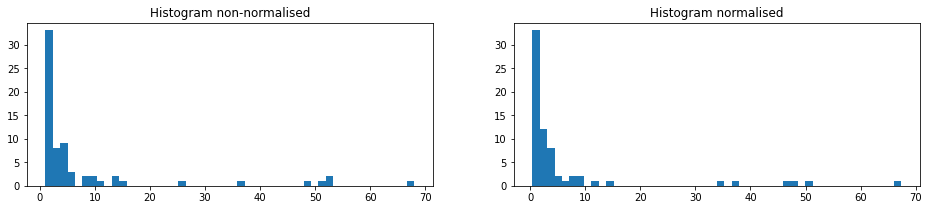

In [47]:
X=df_train['CE_product_id']
X_norm = X-X.mean()/X.std()
fig, axs = plt.subplots(1, 2, figsize=(16,3))
axs[0].hist(X.sample(frac=0.01), bins=50)
axs[0].set_title('Histogram non-normalised')
axs[1].hist(X_norm.sample(frac=0.01), bins=50)
axs[1].set_title('Histogram normalised')

4.2.2 Log-based normalization
Some features are not normal distributed in the raw format. If they have a long-tail distribution, we can normalize them by applying the log function, first.
![Log-based normalization](t.png)
User behavior data have often a long-tail distribution, such as # of clicks or # of purchases.

In [ ]:

X_log = np.log(X+1)
X_norm = (X_log-X_log.mean())/X_log.std()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,3))
axs[0].hist(X.sample(frac=0.01), bins=50)
axs[0].set_title('Histogram non-normalised')
axs[1].hist(X_norm.sample(frac=0.01), bins=50)
axs[1].set_title('Histogram normalis')

## 4.2.3 Scale to 0-1
- Another technique is to scale the numerical features between 0-1.

![Scale 0to1](i.png)

In [ ]:
X = df_train['TE_cat_2']
X_norm = X-X.min()/X.max()-X.min()
plt.hist(((X-X.min())/(X.max()-X.min())).sample(frac=0.01), bins=50)

## 4.3. Gauss Rank
We generate some numerical features with the feature engineering from the previous notebooks.

In [ ]:
def target_encode(train, valid, col, target, kfold=5, smooth=20, gpu=True):
    """
        train:  train dataset
        valid:  validation dataset
        col:   column which will be encoded (in the example RESOURCE)
        target: target column which will be used to calculate the statistic
    """
    
    # We assume that the train dataset is shuffled
    train['kfold'] = ((train.index) % kfold)
    # We keep the original order as cudf merge will not preserve the original order
    if gpu:
        train['org_sorting'] = cupy.arange(len(train), dtype="int32")
    else:
        train['org_sorting'] = np.arange(len(train), dtype="int32")
    # We create the output column, we fill with 0
    col_name = '_'.join(col)
    train['TE_' + col_name] = 0.
    for i in range(kfold):
        ###################################
        # filter for out of fold
        # calculate the mean/counts per group category
        # calculate the global mean for the oof
        # calculate the smoothed TE
        # merge it to the original dataframe
        ###################################
        
        df_tmp = train[train['kfold']!=i]
        mn = df_tmp[target].mean()
        df_tmp = df_tmp[col + [target]].groupby(col).agg(['mean', 'count']).reset_index()
        df_tmp.columns = col + ['mean', 'count']
        df_tmp['TE_tmp'] = ((df_tmp['mean']*df_tmp['count'])+(mn*smooth)) / (df_tmp['count']+smooth)
        df_tmp_m = train[col + ['kfold', 'org_sorting', 'TE_' + col_name]].merge(df_tmp, how='left', left_on=col, right_on=col).sort_values('org_sorting')
        df_tmp_m.loc[df_tmp_m['kfold']==i, 'TE_' + col_name] = df_tmp_m.loc[df_tmp_m['kfold']==i, 'TE_tmp']
        train['TE_' + col_name] = df_tmp_m['TE_' + col_name].fillna(mn).values

    
    ###################################
    # calculate the mean/counts per group for the full training dataset
    # calculate the global mean
    # calculate the smoothed TE
    # merge it to the original dataframe
    # drop all temp columns
    ###################################    
    
    df_tmp = train[col + [target]].groupby(col).agg(['mean', 'count']).reset_index()
    mn = train[target].mean()
    df_tmp.columns = col + ['mean', 'count']
    df_tmp['TE_tmp'] = ((df_tmp['mean']*df_tmp['count'])+(mn*smooth)) / (df_tmp['count']+smooth)
    if gpu:
        valid['org_sorting'] = cupy.arange(len(valid), dtype="int32")
    else:
        valid['org_sorting'] = np.arange(len(valid), dtype="int32")
    df_tmp_m = valid[col + ['org_sorting']].merge(df_tmp, how='left', left_on=col, right_on=col).sort_values('org_sorting')
    valid['TE_' + col_name] = df_tmp_m['TE_tmp'].fillna(mn).values
    
    valid = valid.drop('org_sorting', axis=1)
    train = train.drop('kfold', axis=1)
    train = train.drop('org_sorting', axis=1)
    return(train, valid)

## 4.3. Gauss Rank
We generate some numerical features with the feature engineering from the previous notebooks.
- most used by deep learning
## Theory
In the previous notebook, we discussed how important Normalization is for neural networks. We learned some basic strategies for normalizing numerical features. In this notebook, we will provide another normalization technique, called *Gauss Rank*.
*Gauss Rank* transforms any arbitrary distribution to a Gaussian normal distribution by

- Compute the rank (or sort the values ascending)
- Scale the values linearly from -1 to +1
- Apply the erfinv function

![Scale 0to1](u.png)

In [65]:
from scipy import special

In [66]:
def gaussrank_cpu(data, epsilon = 1e-6):
    r_cpu = data.argsort().argsort()
    r_cpu = (r_cpu/r_cpu.max()-0.5)*2 # scale to (-1,1)
    r_cpu = np.clip(r_cpu,-1+epsilon,1-epsilon)
    r_cpu = special.erfinv(r_cpu)#invers erro function
    return(r_cpu)

Text(0.5, 1.0, 'Histogram Gauss Rank')

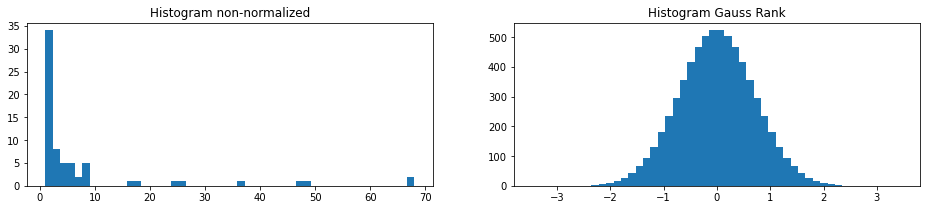

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(16,3))
col = 'CE_product_id'
data_sample = df_train[col].sample(frac=0.01)
axs[0].hist(data_sample.values, bins=50)
axs[1].hist((gaussrank_cpu(df_train[col].values)), bins=50)
axs[0].set_title('Histogram non-normalized')
axs[1].set_title('Histogram Gauss Rank')
